# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the dataset

In [2]:
dataset = pd.read_csv('Preprocess_template_data.csv')
dataset.sample
dataset.head(10)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


# Data Understanding: EDA + Basic Analytics

## Check Missing data

<Axes: >

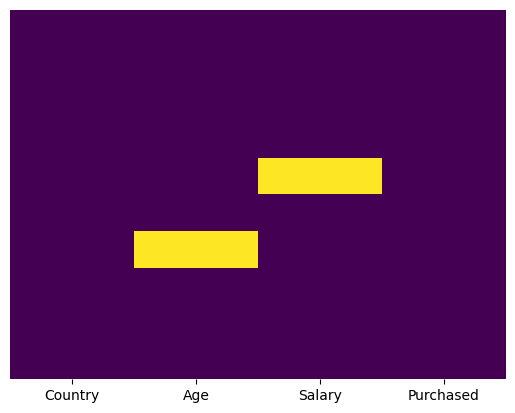

In [3]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [4]:
# count missing values in each variable
dataset.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

## Descriptive Statistics : Centrality and Dispersion

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

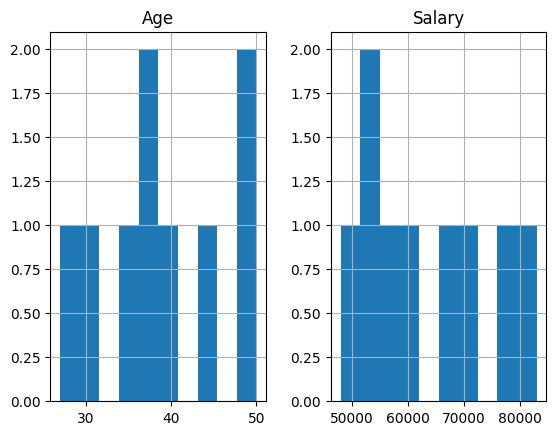

In [5]:
dataset.hist()

# Data Pre-processing

## Taking care of missing data

In [6]:
#Taking care of missing data
A_mean = dataset['Age'].mean()
S_mean = dataset['Salary'].mean()
dataset['Age'].fillna(A_mean, inplace=True)
dataset['Salary'].fillna(S_mean, inplace=True)

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


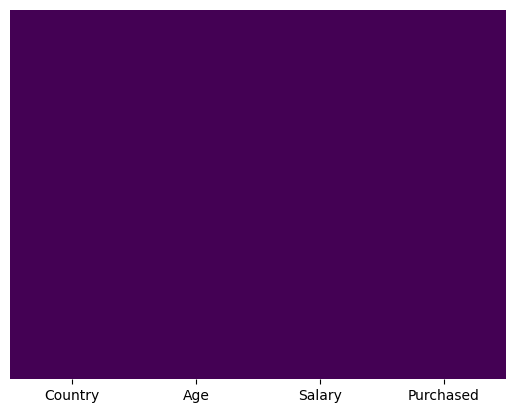

In [7]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')
dataset.head(10)

## Set roles X and y for supervised-learning

In [8]:
y_df = dataset[['Purchased']]
dataset.drop(['Purchased'],axis=1,inplace=True)
X_df = dataset
with pd.option_context('display.max_rows', 10): display(X_df)

,Country,Age,Salary
0,France,44.000000,72000.000000
1,Spain,27.000000,48000.000000
2,Germany,30.000000,54000.000000
3,Spain,38.000000,61000.000000
4,Germany,40.000000,63777.777778
5,France,35.000000,58000.000000
6,Spain,38.777778,52000.000000
7,France,48.000000,79000.000000
8,Germany,50.000000,83000.000000
9,France,37.000000,67000.000000


In [9]:
X = X_df.values
y = y_df.values
print(y)

[['No']
 ['Yes']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['Yes']
 ['No']
 ['Yes']]


## Encoding the Independent Variables

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [11]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


## Encoding the Dependent Variable

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


## Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [15]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [16]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [17]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [18]:
print(y_test)

[0 1]


## Feature Scaling on Training Set & Test Set

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [20]:
print(X_train)

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]


In [21]:
print(X_test)

[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]


# Train Logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegression
# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)
# ประเมินประสิทธิภาพของ Model ที่ Test Data
print('Test set accuracy:', model.score(X_test, y_test))

Test set accuracy: 0.5
